<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

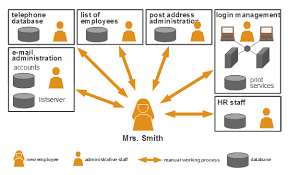

## EMPLOYEE ACCESS PREDICTION (MACHINE LEARNING - ADVANCED)

**Submitted by NARAYAN V. SHANBHAG**

**GCD Student, INSAID**

**Batch: May 9,2021**

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**


They are committed to the creation of accurate weather forecasts that clients can trust, going to extra effort to make their weather API easy to consume.
---
### Company Introduction - ECorp

##### Your client for this project is a multinational technology company - ECorp

- 1) **ECorp** is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.
- 2) They are spread across the globe with hundreds of thousands of employees in these domains.
- 3) When an employee at any company starts working, they first need to obtain the resource access necessary to fulfill their role.
- 4) Employees passing certain criteria regarding their primary and secondary roles are granted access to the requested resources.
- 5) This efficient system has helped the company maintain background checks of its employees and usage of allocated resources.


### Current Scenario
 - A group of employees has been invited to test the automated system. An auto-access model seeks to minimize the human involvement required to grant or revoke employee access.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

### The company suffers from the following problems:

   - If an employee discovers that they need **access** to certain resources, they are supposed to contact a **knowledgeable supervisor.**
   - The supervisor takes time to **manually grant** the needed access to the requesting employee.
   - As employees move throughout a company, this access discovery/recovery cycle **wastes a non-trivial amount** of **time and money.**

The company has hired you as a data science consultant.
They want to automate the process of approving or revoking access to a resource according to their role in the company.


### Your Role
   - You are given a dataset containing the **ACTION** (ground truth), **RESOURCE**, and information about the employee's **role** at the time of approval.
   - The model will **take** an employee's **role information** and the requested resource in the form of a **resource code** and will **determine** if an employee should be given **access or not.**
   - Your task is to build a **binary-class classification** model using the dataset.
   - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverable
   - Deliverable:**Employee Access Classification.**
   - Machine Learning Task: **Classification**
   - Target Variable: **ACTION(1/0)**
   - Win Condition: N/A (best possible model)

### Evaluation Metric
   - The model evaluation will be based on the **Accuracy Score**.

# **3. Installing & Importing Libraries**
---
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         
# Package that is required by pandas profiling
!pip install -q pandas-profiling                                    
# Library to generate basic statistics about data

# To install more libraries insert your code here..


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          
# Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# 4. Data  Description

 - The dataset contains all the necessary information about an Employee like their ID and roles in the company, their Manager’s ID, RESOURCE id, and the ACTION.
 - The data consists of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time.
 - This is the data that we have to **predict for future samples.**
 
#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **24576 rows** and **6 columns**
 - The last column **RAIN** is the **target variable**.

#### Testing Set:
 - The test set contains **8193  rows** and **11 columns**.
 - The test set **doesn’t contain** the **ACTION** column. 
 - It needs to be predicted for the test set.
 

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**24576**|**11**|**ACTION**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**8193**|**5**|**ACTION**|
 
 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| ID    | Unique Identity of the Employee.|
|02| RESOURCE  | An ID for each resource.| 
|03| MGR_ID  | The amount of precipitation, in inches.| 
|04| ROLE_ROLLUP_1  | Company role grouping category id 1 (e.g. US Engineering).|   
|05| ROLE_ROLLUP_2 | Company role grouping category id 2 (e.g. US Retail).|
|06| ROLE_DEPTNAME  | Company role department description (e.g. Retail).|
|07| ROLE_TITLE | Company role business title description (e.g. Senior Engineering Retail Manager).|
|08| ROLE_FAMILY_DESC  | Company role family extended description (e.g. Retail Manager, Software Engineering)|
|09| ROLE_FAMILY  | Company role family description (e.g. Retail Manager).|
|10| ROLE_CODE | Company role code; this code is unique to each role (e.g. Manager).|
|11| ACTION | ACTION is 1 if the resource was approved, 0 if the resource was no.|

---
<a name = Section4></a>
# **5. Data Acquisition**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:



In [ ]:
#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Churn_train.csv']))


In [ ]:
#data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
data = pd.read_csv("D://EmployeeAccess_train.csv",skipinitialspace=True)
data
print('Data Shape:', data.shape)
data.head()
#Initial Analysis shows there are 5634 RECORDS/ROWS and 21 FEATURES/COLUMNS

 ### **Data Information**
- **Totally there are 22 Columns/Features out of which 1(Id) is NUMERICAL(INTEGER), 1 is CATEGORICAL and the rest are NUMERICAL(FLOAT)**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**


In [ ]:
# Insert your code here
data.info()

### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
-**Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [ ]:
data.describe()

In [ ]:
data_final = pd.read_csv("D://EmployeeAccess_test.csv",skipinitialspace=True)
print('Data Shape:', data_final.shape)
data_final.head()

In [ ]:
data_final.info()

In [ ]:
data_final.describe()

---
<a name = Section5></a>
# **6. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [ ]:
# Insert your code here...
profile_Employee_Access_Prediction_Train = ProfileReport(df=data)
profile_Employee_Access_Prediction_Train

**5.1 Data Pre-Profiling for TEST SET**

In [ ]:
profile1_Employee_Access_Prediction_Test = ProfileReport(df=data_final)
profile1_Employee_Access_Prediction_Test

---
<a name = Section6></a>
# **7. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [ ]:
# Insert your code here...
data[data.duplicated()]

In [ ]:
data_final[data_final.duplicated()]

-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

In [ ]:
data.isnull().sum()

In [ ]:
(data == 0 ).sum(axis = 0)

In [ ]:
data_final.isnull().sum()

In [ ]:
(data_final == 0 ).sum(axis = 0)

In [ ]:
data['ROLE_FAMILY'].mode()

### **Check whether the DataSet is Balanced for the label column**

In [ ]:
data.label.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90);
data.label.value_counts()

In [ ]:
figure = plt.figure(figsize = (20,10))
HeatMap = sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm',vmin = -1, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

### OBSERVATIONS

In [ ]:
import sweetviz as sv
sweet_report_Employee_Access_Prediction = sv.analyze(data)
sweet_report_Employee_Access_Prediction.show_html('Seattle_Weather_Prediction_Sweet_Report_.html')

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('D:/EmployeeAccess_train.csv',verbose=2,save_plot_dir="D:/")  

In [ ]:
data.columns

In [ ]:
x = data[['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']]
x.head()

In [ ]:
y = data[['ACTION']]
y.head()

---
# **6. Exploratory Data Analysis**

#### **Question:** What is the distribution of the **target** feature?

In [ ]:
# Plot a displot on target variable
data_sns = data
sns.displot(x='label', data=data_sns, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

# **7. Data Post Processing**

### **7.1 Feature Scaling**

- Now we will **standardize** the columns of the dataframe using `StandardScaler`. 

In [ ]:
datatype = y.dtypes['ACTION']
print(datatype)

### AT THIS POINT I AM GETTING ERROR ...WIERD OUTPUT

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

### Import the train Import the train test split and split the data into train and test data for x and y.

-from sklearn.model_selection import train_test_split split and split the data into train and test data for x and y.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

# **8. Model Development & Evaluation**

### **8.1 Model Development & Evaluation without PCA**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import plotly.graph_objs as go                                      # Importing plotly for interactive visualizations
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features in the dataset
from sklearn.model_selection import train_test_split                # To properly split the dataset into train and test sets
from sklearn.ensemble import RandomForestClassifier                  # To create a random forest regressor model
from sklearn.linear_model import LogisticRegression                   # To create a linear regression model
from sklearn import metrics                                         # Importing to evaluate the model used for regression
from sklearn.decomposition import PCA                               # Importing to create an instance of PCA model
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # For time functionality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### Importing the evaluation metrics for Classification model - Logistic Regression


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
#clfs = [LogisticRegression(solver='liblinear'), RandomForestClassifier(random_state=42)]

In [ ]:
logreg_model =  LogisticRegression(solver='liblinear')

In [ ]:
randforest_model = RandomForestClassifier(random_state=42)

In [ ]:
logreg_model.fit(x_train, y_train)

In [ ]:
randforest_model.fit(x_train, y_train)

In [ ]:
y_pred_train_lr = logreg_model.predict(x_train)
y_pred_train_lr

In [ ]:
y_pred_test_lr = logreg_model.predict(x_test)
y_pred_test_lr

In [ ]:
y_pred_train_rf = randforest_model.predict(x_train)
y_pred_train_rf

In [ ]:
y_pred_test_rf = randforest_model.predict(x_test)
y_pred_test_rf

### ACCURACY SCORE and F1-SCORE of Logistic regression Train Set

In [ ]:
ACCURACY_SCORE_TRAIN_LR = accuracy_score(y_train,y_pred_train_lr)
F1_SCORE_TRAIN_LR = f1_score(y_train,y_pred_train_lr)
print(ACCURACY_SCORE_TRAIN_LR)
print(F1_SCORE_TRAIN_LR)

### ACCURACY SCORE and F1-SCORE of Logistic regression Test Set

In [ ]:
ACCURACY_SCORE_TEST_LR = accuracy_score(y_test,y_pred_test_lr)
F1_SCORE_TEST_LR = f1_score(y_test,y_pred_test_lr)
print(ACCURACY_SCORE_TEST_LR)
print(F1_SCORE_TEST_LR)

### ACCURACY SCORE and F1-SCORE of Random Forest Classifier Train Set

In [ ]:
ACCURACY_SCORE_TRAIN_RF = accuracy_score(y_train,y_pred_train_rf)
F1_SCORE_TRAIN_RF = f1_score(y_train,y_pred_train_rf)
print(ACCURACY_SCORE_TRAIN_RF)
print(F1_SCORE_TRAIN_RF)

### ACCURACY SCORE and F1-SCORE of Random Forest Classifier Test Set

In [ ]:
ACCURACY_SCORE_TEST_RF = accuracy_score(y_test,y_pred_test_rf)
F1_SCORE_TEST_RF = f1_score(y_test,y_pred_test_rf)
print(ACCURACY_SCORE_TRAIN_RF)
print(F1_SCORE_TRAIN_RF)

## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [ ]:
data_submission = data_final['ID']
data_submission

In [ ]:
data_final_numerical = data_final[['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']]
data_final_numerical

In [ ]:
data_final_model = data_final_numerical

### Predict the label values using the earlier trained Logistic Regression Model

In [ ]:
y_pred_test_final_logistic = logreg_model.predict(data_final_model)
y_pred_test_final_logistic

### Convert the array into a DataFrame

In [ ]:
y_pred_test_final_logistic = pd.DataFrame(y_pred_test_final_logistic)

In [ ]:
y_pred_test_final_logistic

In [ ]:
y_pred_test_final_random_forest = randforest_model.predict(data_final_model)
y_pred_test_final_random_forest

In [ ]:
y_pred_test_final_random_forest = pd.DataFrame(y_pred_test_final_random_forest)
y_pred_test_final_random_forest

## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(Id) and TARGET column(label)

In [ ]:
submission_file = pd.concat([data_submission,y_pred_test_final_random_forest], axis = 1)

In [ ]:
submission_file

### To write the final data to the submission file which is .csv without HEADER and INDEX

In [ ]:
submission_file.to_csv('D://Employee_Access_Prediction_Submission.csv', header=False, index=False)

### Thank You !!!